Overview:

Monkeypox is a viral zoonosis (a virus transmitted to humans from animals) with symptoms similar to those seen in the past in smallpox patients, although it is clinically less severe. With the eradication of smallpox in 1980 and subsequent cessation of smallpox vaccination, monkeypox has emerged as the most important orthopoxvirus for public health. Monkeypox primarily occurs in central and west Africa, often in proximity to tropical rainforests, and has been increasingly appearing in urban areas. Animal hosts include a range of rodents and non-human primates.

So here we are provided with day wise tweets on this deadly topic in the form of csv files.

Let's get started to know more about tweet's textual data by deep analysis and getting to know the sentiments behind it...

Importing necessities

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import string
import nltk
import re
import random
import plotly.express as px
import requests
import keras.backend as K
import tensorflow as tf

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords, words
from io import BytesIO
from PIL import Image
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD, RMSprop

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Uploading the files and reading the data

In [9]:
import pandas as pd

# List the file paths of all CSV files you want to read
file_paths = [
    '/content/mpox-08-19-2022.csv',
    '/content/mpox-08-20-2022.csv',
    '/content/mpox-08-21-2022.csv',
    '/content/mpox-08-22-2022.csv',
    '/content/mpox-08-23-2022.csv',
    '/content/mpox-08-24-2022.csv',
    '/content/mpox-08-25-2022.csv',
    '/content/mpox-08-26-2022.csv',
    '/content/mpox-08-27-2022.csv',
    '/content/mpox-08-28-2022.csv',
    '/content/mpox-08-29-2022.csv',
    '/content/mpox-08-30-2022.csv',
    '/content/mpox-08-31-2022.csv',
    '/content/mpox-09-01-2022.csv',
    '/content/mpox-09-02-2022.csv',
    '/content/mpox-09-03-2022.csv',
]

# Read and concatenate the data from all CSV files into a single DataFrame
combined_data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Now, combined_data contains the data from all CSV files
combined_data.head()


,Unnamed: 0,date,time,id,tweet,language,replies_count,retweets_count,likes_count,conversation_id,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0.0,2022-08-19,21:47:43,1560624556175343617,@ArtValley818_ Is his spirit animal monkey pox?,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2022-08-19,21:47:38,1560624535283589123,@Sara_inquirer Hindsight is 20/20. And can pro...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2022-08-19,21:47:38,1560624532838182913,@OHAOregon Any time a child gets monkey pox I ...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2022-08-19,21:47:35,1560624522176434177,[ICYMI] WATCH | Phaahla confirms fifth Monkeyp...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2022-08-19,21:47:33,1560624514651791366,Monkeypox cancels free concert held at Souther...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
file_paths

['/content/mpox-08-19-2022.csv',
 '/content/mpox-08-20-2022.csv',
 '/content/mpox-08-21-2022.csv',
 '/content/mpox-08-22-2022.csv',
 '/content/mpox-08-23-2022.csv',
 '/content/mpox-08-24-2022.csv',
 '/content/mpox-08-25-2022.csv',
 '/content/mpox-08-26-2022.csv',
 '/content/mpox-08-27-2022.csv',
 '/content/mpox-08-28-2022.csv',
 '/content/mpox-08-29-2022.csv',
 '/content/mpox-08-30-2022.csv',
 '/content/mpox-08-31-2022.csv',
 '/content/mpox-09-01-2022.csv',
 '/content/mpox-09-02-2022.csv',
 '/content/mpox-09-03-2022.csv']

In [11]:
import os
import glob
import pandas as pd

# Define the path to the folder where the CSV files are located in your Colab environment
folder_path = '/content/'

# Use a wildcard to match CSV files in the folder
files = os.path.join(folder_path, "mpox-*.csv")

# List of matched CSV files
files = glob.glob(files)

# Read and concatenate the data from all matched CSV files into a single DataFrame
data = pd.concat(map(pd.read_csv, files), ignore_index=True)

# Now, 'data' contains the data from all CSV files in the folder
data.head()


,Unnamed: 0,date,time,id,tweet,language,replies_count,retweets_count,likes_count,conversation_id,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0.0,2022-08-20,10:08:03,1560810865359835136,@Idolmaker66 @6abc They can't prove anything a...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2022-08-20,10:07:59,1560810847911530497,Health official says risk remains low as Manit...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2022-08-20,10:07:52,1560810818589130752,Penn State University Student Tests Positive F...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2022-08-20,10:07:36,1560810752985903105,Viruela del mono: Estos son los tratamientos d...,es,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2022-08-20,10:07:30,1560810727526522880,@dumpfacebooknow @brianstelter @CNN 😂 go get m...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data = data.drop(columns={'Unnamed: 0'})
data.head()

,date,time,id,tweet,language,replies_count,retweets_count,likes_count,conversation_id,created_at,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,2022-08-20,10:08:03,1560810865359835136,@Idolmaker66 @6abc They can't prove anything a...,en,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-20,10:07:59,1560810847911530497,Health official says risk remains low as Manit...,en,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-20,10:07:52,1560810818589130752,Penn State University Student Tests Positive F...,en,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-20,10:07:36,1560810752985903105,Viruela del mono: Estos son los tratamientos d...,es,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-08-20,10:07:30,1560810727526522880,@dumpfacebooknow @brianstelter @CNN 😂 go get m...,en,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print('Rows and columns in training dataset : ',data.shape)

Rows and columns in training dataset :  (95246, 36)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95246 entries, 0 to 95245
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             95246 non-null  object 
 1   time             95246 non-null  object 
 2   id               95246 non-null  int64  
 3   tweet            95246 non-null  object 
 4   language         95246 non-null  object 
 5   replies_count    95246 non-null  int64  
 6   retweets_count   95246 non-null  int64  
 7   likes_count      95246 non-null  int64  
 8   conversation_id  3360 non-null   float64
 9   created_at       3360 non-null   object 
 10  timezone         3360 non-null   float64
 11  user_id          3360 non-null   float64
 12  username         3360 non-null   object 
 13  name             3360 non-null   object 
 14  place            2 non-null      object 
 15  mentions         3360 non-null   object 
 16  urls             3360 non-null   object 
 17  photos      

In [15]:
data = data[['date', 'time', 'id', 'tweet', 'language', 'replies_count', 'retweets_count', 'likes_count']]
data.head()

,date,time,id,tweet,language,replies_count,retweets_count,likes_count
0,2022-08-20,10:08:03,1560810865359835136,@Idolmaker66 @6abc They can't prove anything a...,en,0,0,0
1,2022-08-20,10:07:59,1560810847911530497,Health official says risk remains low as Manit...,en,0,0,0
2,2022-08-20,10:07:52,1560810818589130752,Penn State University Student Tests Positive F...,en,0,0,0
3,2022-08-20,10:07:36,1560810752985903105,Viruela del mono: Estos son los tratamientos d...,es,0,0,0
4,2022-08-20,10:07:30,1560810727526522880,@dumpfacebooknow @brianstelter @CNN 😂 go get m...,en,0,0,0


In [16]:
data.isna().sum()

date              0
time              0
id                0
tweet             0
language          0
replies_count     0
retweets_count    0
likes_count       0
dtype: int64

In [24]:
!pip install emot --user


 # Data preprocessing

In [29]:
def process_tweets(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('(@[A-Za-z0-9_]+)','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.split()
    text = ' '.join(text)
    return text


data['Selected_text'] = data['tweet'].apply(process_tweets)

In [30]:
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)

In [31]:
data['text_len'] = data['Selected_text'].astype(str).apply(len)
data['text_word_count'] = data['Selected_text'].apply(lambda x: len(str(x).split()))

print("Average length of tweets : ", round(np.mean(data['text_len'])))
print("Average word counts of tweets : ", round(np.mean(data['text_word_count'])))

Average length of tweets :  106
Average word counts of tweets :  18


# Assigning Sentiments

In [32]:
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"


data['Polarity']=data['Selected_text'].apply(getPolarity)
data['Sentiment']=data['Polarity'].apply(getSentimentTextBlob)

In [33]:
data.head()

,date,time,id,tweet,language,replies_count,retweets_count,likes_count,Selected_text,text_len,text_word_count,Polarity,Sentiment
0,2022-08-20,10:08:03,1560810865359835136,@Idolmaker66 @6abc They can't prove anything a...,en,0,0,0,they cant prove anything about covid or monkeypox,49,8,0.000000,Neutral
1,2022-08-20,10:07:59,1560810847911530497,Health official says risk remains low as Manit...,en,0,0,0,health official says risk remains low as manit...,81,13,0.125000,Positive
2,2022-08-20,10:07:52,1560810818589130752,Penn State University Student Tests Positive F...,en,0,0,0,penn state university student tests positive f...,58,8,0.227273,Positive
3,2022-08-20,10:07:36,1560810752985903105,Viruela del mono: Estos son los tratamientos d...,es,0,0,0,viruela del mono estos son los tratamientos di...,69,10,0.000000,Neutral
4,2022-08-20,10:07:30,1560810727526522880,@dumpfacebooknow @brianstelter @CNN 😂 go get m...,en,0,0,0,😂 go get monkey pox flamer 🔥,28,7,-0.050000,Negative


# Exploratory Data Analysis

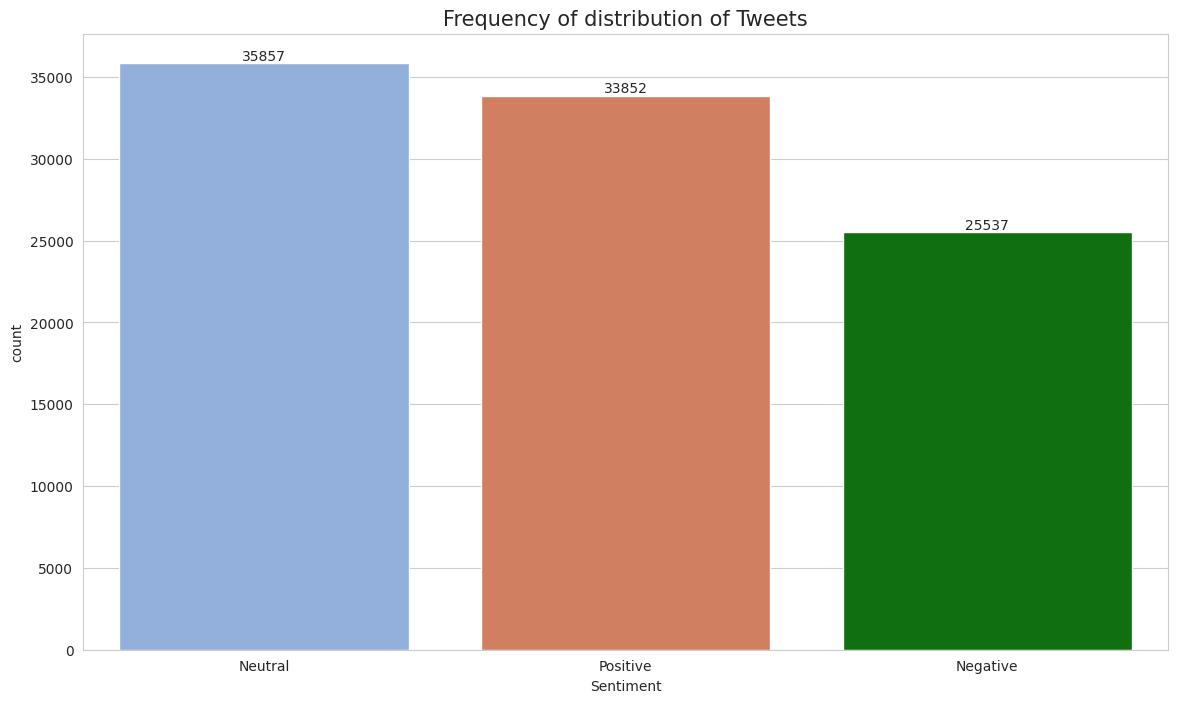

In [34]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(14,8))
colors = ['#87ace8','#e3784d', 'green']

ax = sns.countplot(x='Sentiment',data=data, order = data['Sentiment'].value_counts().index, palette=colors)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of distribution of Tweets',fontsize=15)
plt.show()

fig = px.pie(data, names='Sentiment', height=600, width= 600, color_discrete_sequence=colors,
             title='Pie Chart for distribution of Tweets')
fig.update_traces(textfont_size=20)
fig.show()

# Sentiment wise Tweet data Analysis

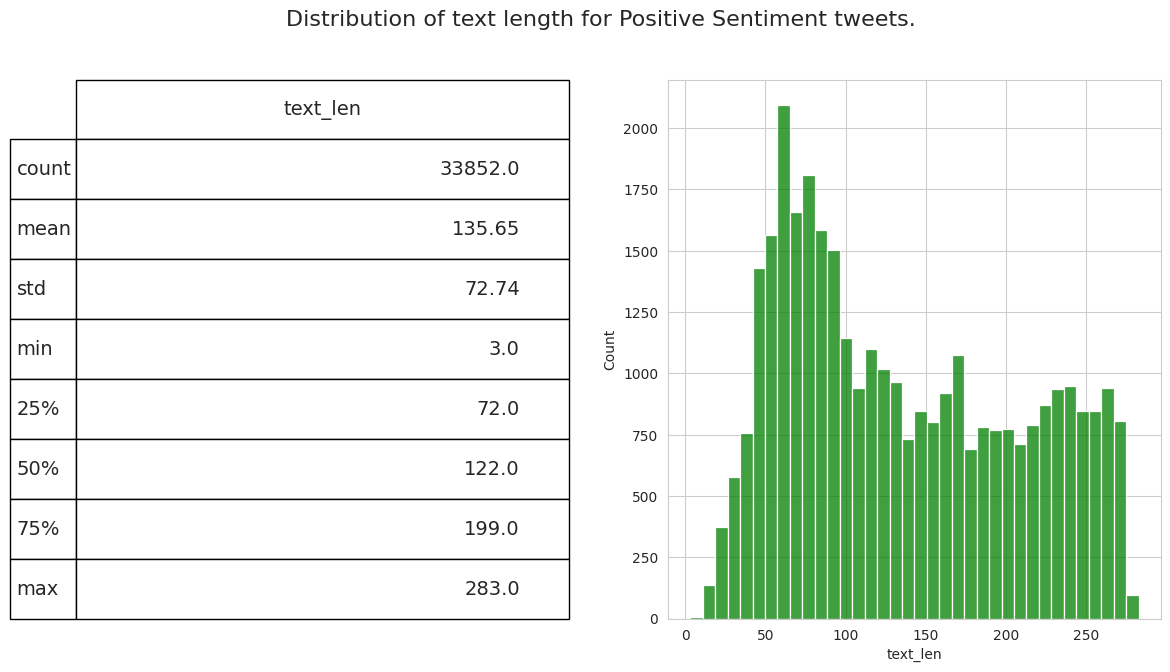

In [35]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Positive']['text_len'], ax=ax1,color='green')
describe = data['text_len'][data['Sentiment']=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Positive Sentiment tweets.', fontsize=16)

plt.show()

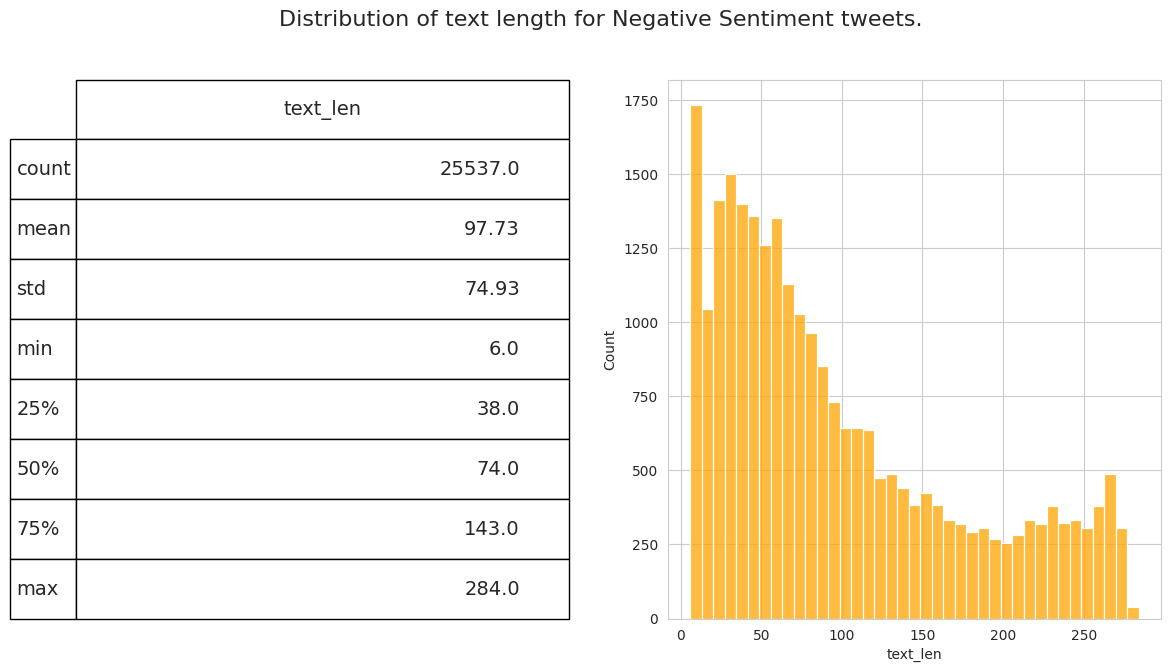

In [36]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Negative']['text_len'], ax=ax1,color='orange')
describe = data['text_len'][data['Sentiment']=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative Sentiment tweets.', fontsize=16)

plt.show()

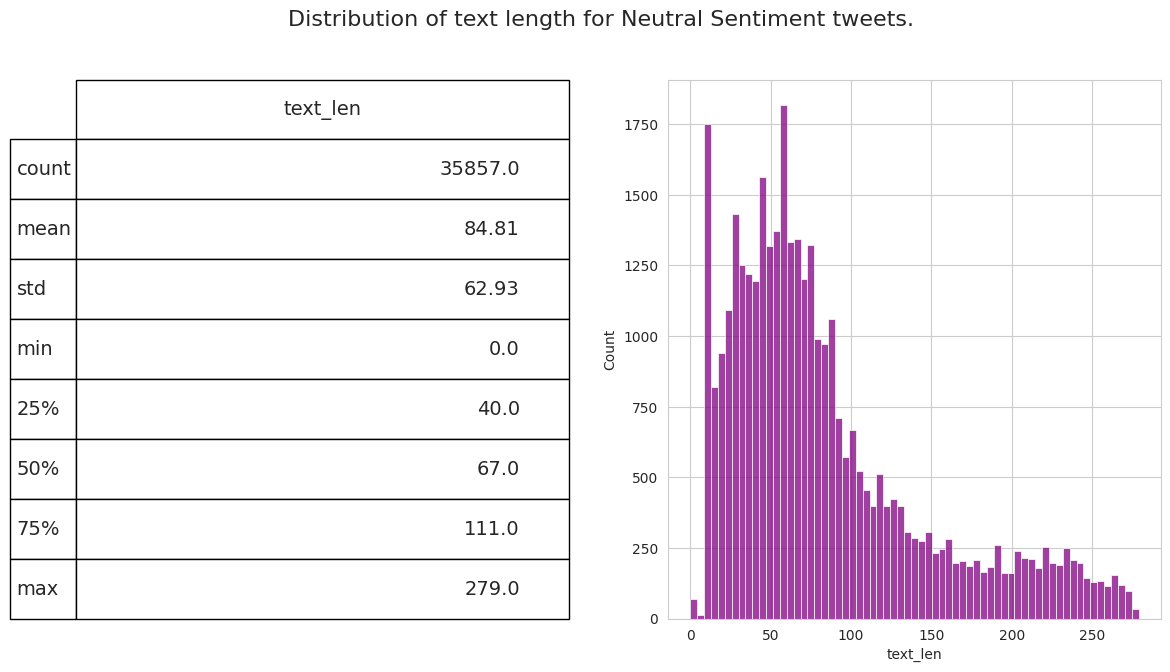

In [37]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Neutral']['text_len'], ax=ax1,color='purple')
describe = data['text_len'][data['Sentiment']=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Neutral Sentiment tweets.', fontsize=16)

plt.show()

## Histograms for Tweet Length and Word Count

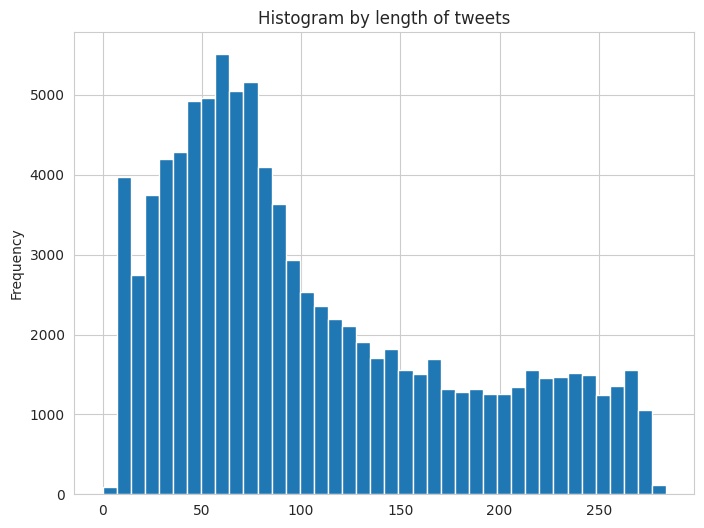

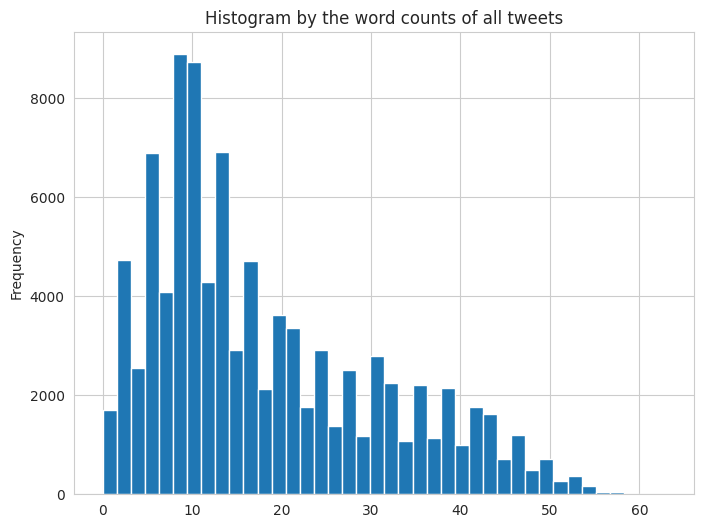

In [38]:
fig,axes = plt.subplots(figsize=(8,6))
data['text_len'].plot(bins = 40, kind = 'hist',title = 'Histogram by length of tweets')
plt.show()

fig,axes = plt.subplots(figsize=(8,6))
data['text_word_count'].plot(bins = 40, kind = 'hist', title = 'Histogram by the word counts of all tweets')
plt.show()

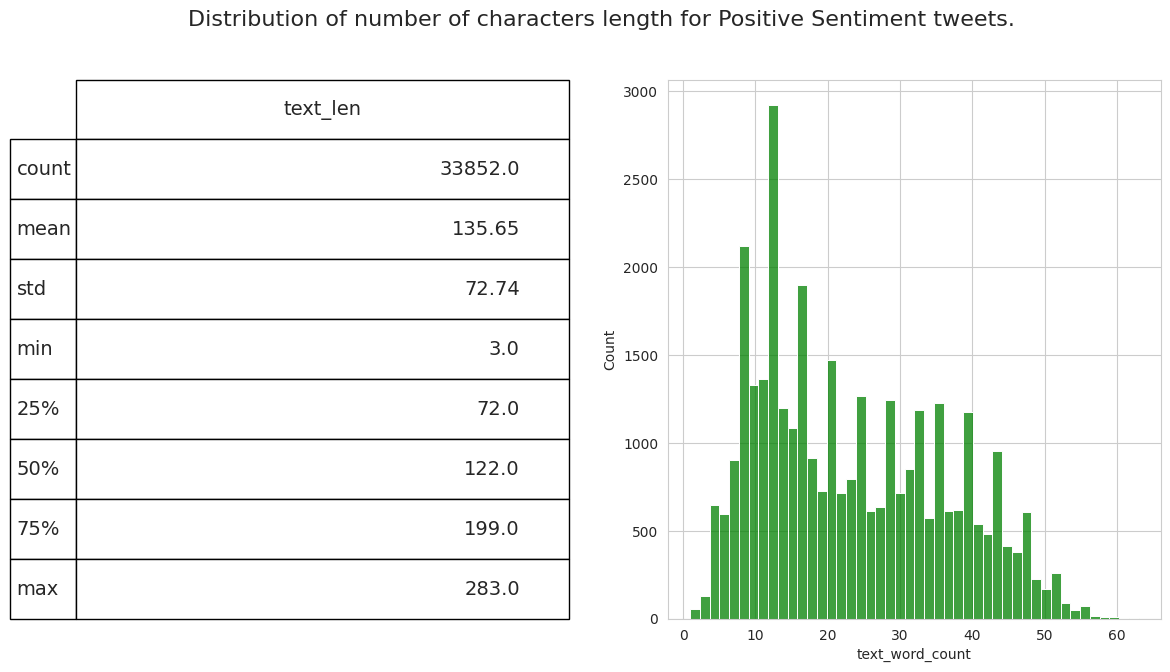

In [39]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Positive']['text_word_count'], ax=ax1,color='green')
describe = data['text_len'][data['Sentiment']=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of number of characters length for Positive Sentiment tweets.', fontsize=16)

plt.show()

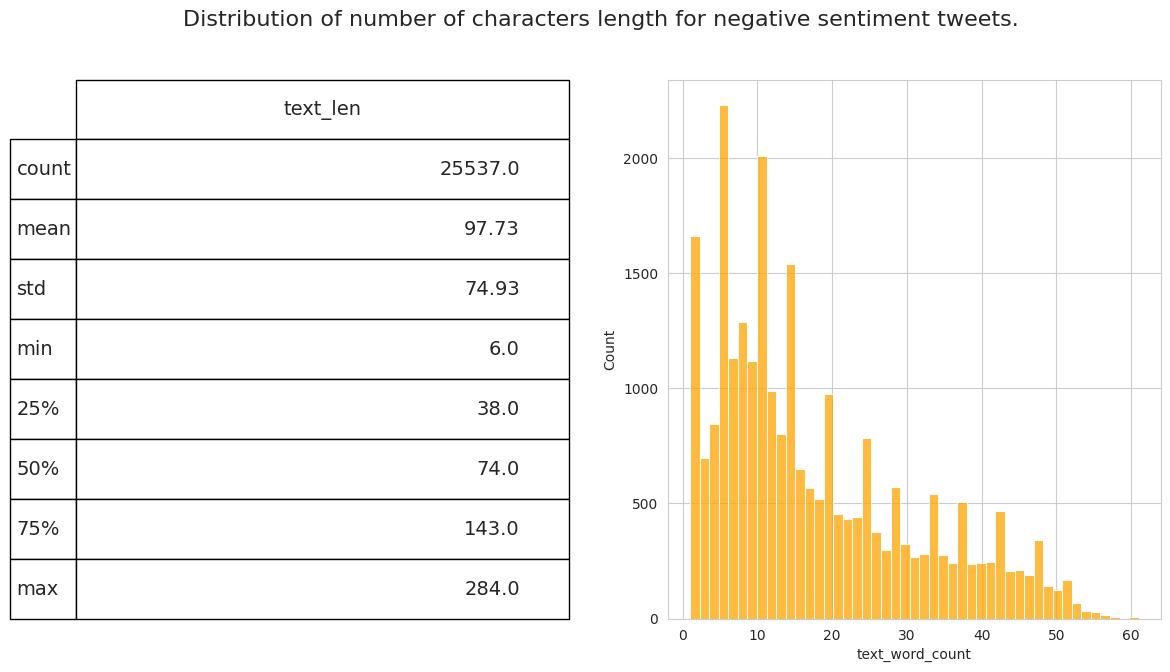

In [40]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Negative']['text_word_count'], ax=ax1,color='orange')
describe = data['text_len'][data['Sentiment']=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of number of characters length for negative sentiment tweets.', fontsize=16)

plt.show()

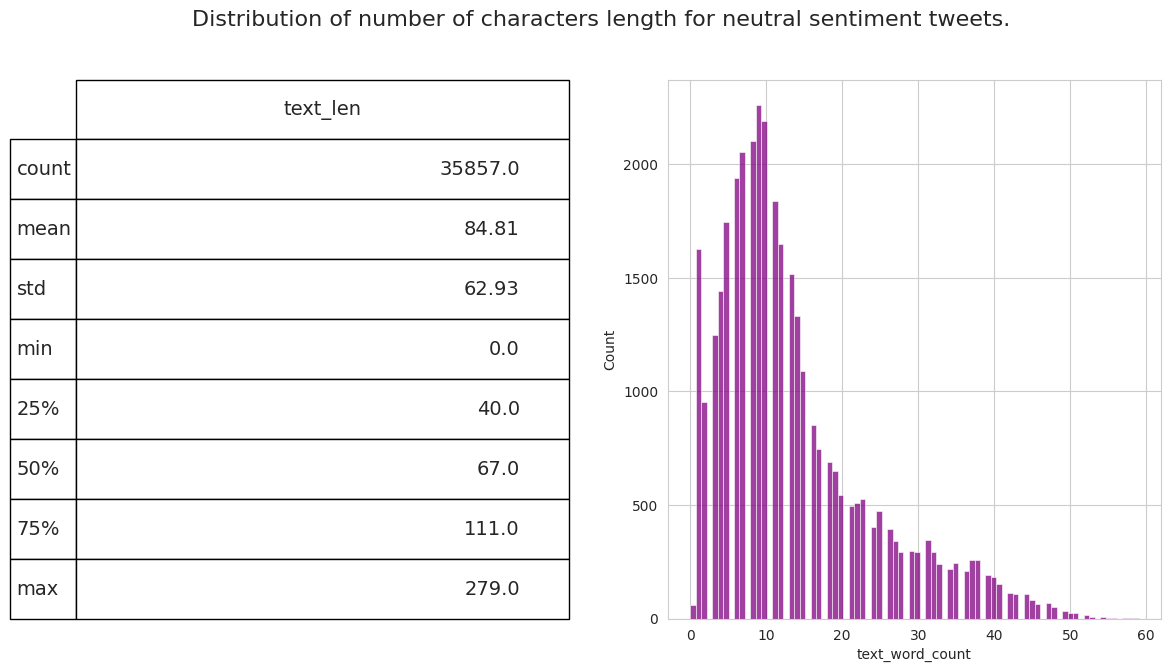

In [41]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Neutral']['text_word_count'], ax=ax1,color='purple')
describe = data['text_len'][data['Sentiment']=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of number of characters length for neutral sentiment tweets.', fontsize=16)

plt.show()

##Most common words in selected_text

In [42]:
data['temp'] = data['Selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data['temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
0,monkeypox,75459
1,the,54243
2,to,36605
3,and,28875
4,a,27918
5,of,27419
6,in,23746
7,monkey,23100
8,pox,22859
9,is,22288


In [43]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [47]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define a function to remove stopwords from a sentence
def remove_stopwords(text):
    if isinstance(text, str):
        words = word_tokenize(text)  # Tokenize the text into words
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        return ' '.join(filtered_words)  # Join the filtered words back into a sentence
    else:
        return text  # If not a string, return the input as is

# Apply the remove_stopwords function to the 'temp' column
data['temp'] = data['temp'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
top = Counter([item for sublist in data['temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','Count']
temp.style.background_gradient(cmap='Reds')

,Common_words,Count
1,the,54243
2,to,36605
3,and,28875
4,a,27918
5,of,27419
6,in,23746
7,monkey,23100
8,pox,22859
9,is,22288
10,for,16348


In [49]:
fig = px.treemap(temp, path=['Common_words'], values='Count',title='Tree of Most Common Words')
fig.show()

In [50]:
Positive_senti = data[data['Sentiment']=='Positive']
Negative_senti = data[data['Sentiment']=='Negative']
Neutral_senti = data[data['Sentiment']=='Neutral']

# Positive Sentiment Common words

In [51]:
# Most common positive words
top = Counter([item for sublist in Positive_senti['temp'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','Count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,Count
0,monkeypox,29467
1,the,29007
2,to,19101
3,and,15201
4,of,15118
5,a,13565
6,in,13327
7,is,11439
8,for,9100
9,monkey,6582


In [52]:
fig = px.bar(temp_positive, x="Count", y="Common_words", title='Commmon Words in Selected Text with Positive Sentiments', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

#Negative Sentiment Common words

In [53]:
# Most common negative words
top = Counter([item for sublist in Negative_senti['temp'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','Count']
temp_negative.style.background_gradient(cmap='Oranges')

,Common_words,Count
0,monkey,16446
1,pox,16133
2,the,14449
3,monkeypox,9966
4,to,9609
5,and,8211
6,a,7702
7,is,6677
8,of,6455
9,i,5293


In [54]:
fig = px.bar(temp_negative, x="Count", y="Common_words", title='Commmon Words in Selected Text with Negative Sentiments', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

# Neutral Sentiment Common words

In [55]:
# Most common neutral words
top = Counter([item for sublist in Neutral_senti['temp'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common_words','Count']
temp_neutral.style.background_gradient(cmap='Purples')

,Common_words,Count
0,monkeypox,36026
1,the,10787
2,to,7895
3,a,6651
4,of,5846
5,and,5463
6,de,5432
7,in,5313
8,is,4172
9,for,3476


In [56]:
fig = px.bar(temp_neutral, x="Count", y="Common_words", title='Commmon Words in Selected Text with Positive Sentiments', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

# WordClouds for Tweet data Sentiment wise.

In [57]:
url = "https://www.citypng.com/public/uploads/preview/-51613572767cozydzabu1.png"
response = requests.get(url)
image = np.array(Image.open(BytesIO(response.content)))

In [59]:
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

In [60]:
def wordcount_gen(df, category):

    combined_tweets = " ".join([tweet for tweet in df[df.Sentiment==category]['Selected_text']])

    wc = WordCloud(background_color='white',
                   max_words=1500,
                   stopwords = STOPWORDS
                  , mask=image)

    wc.generate(combined_tweets)

    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(18)

    plt.imshow(wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

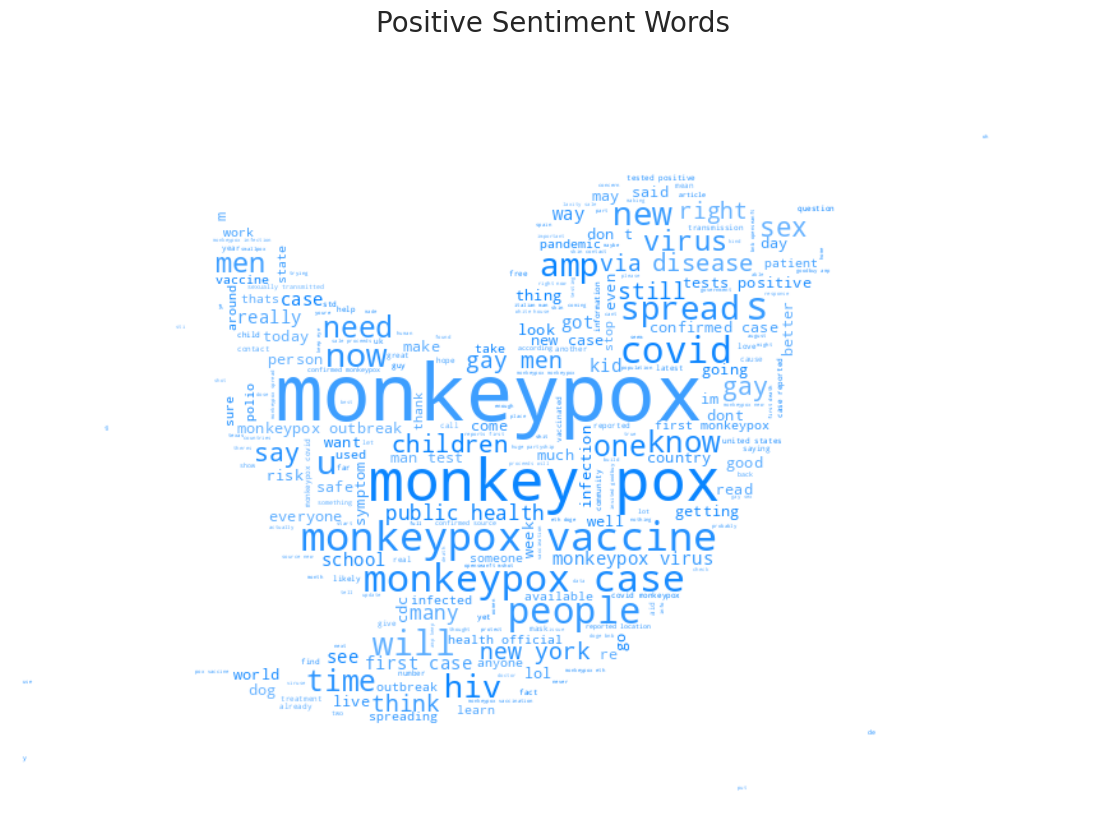

In [61]:
wordcount_gen(data, 'Positive')

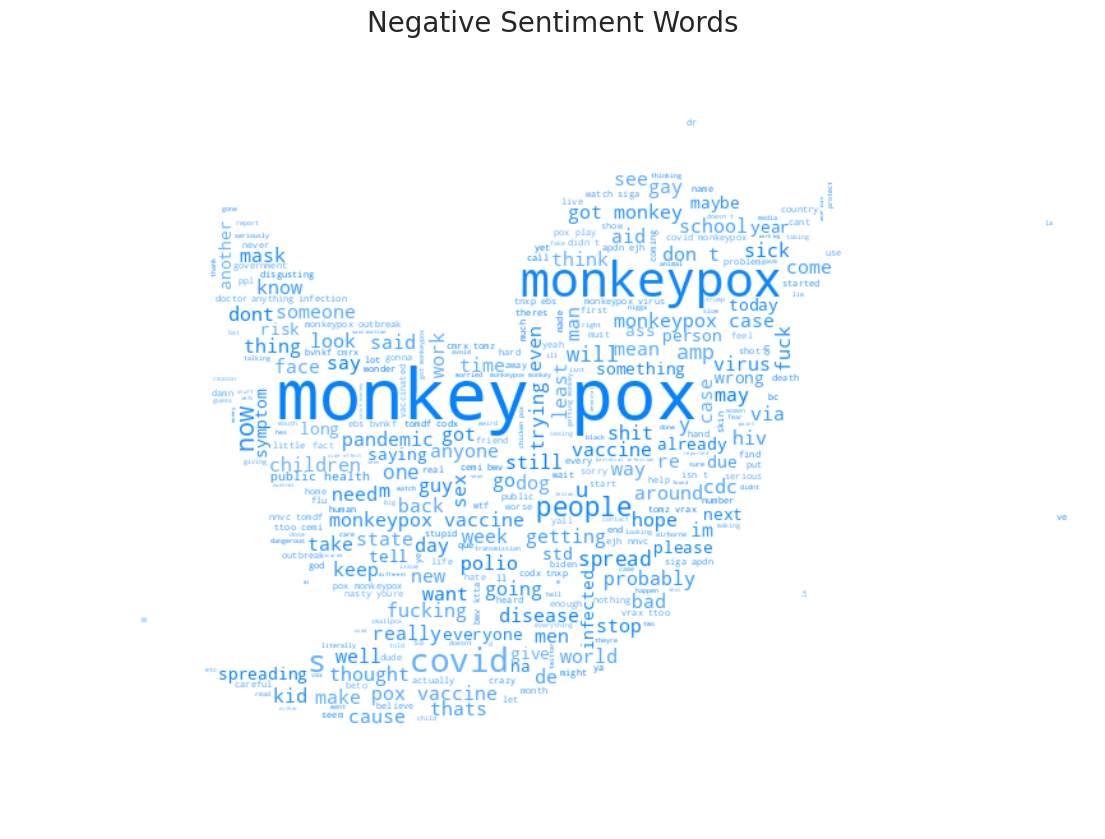

In [62]:
wordcount_gen(data, 'Negative')

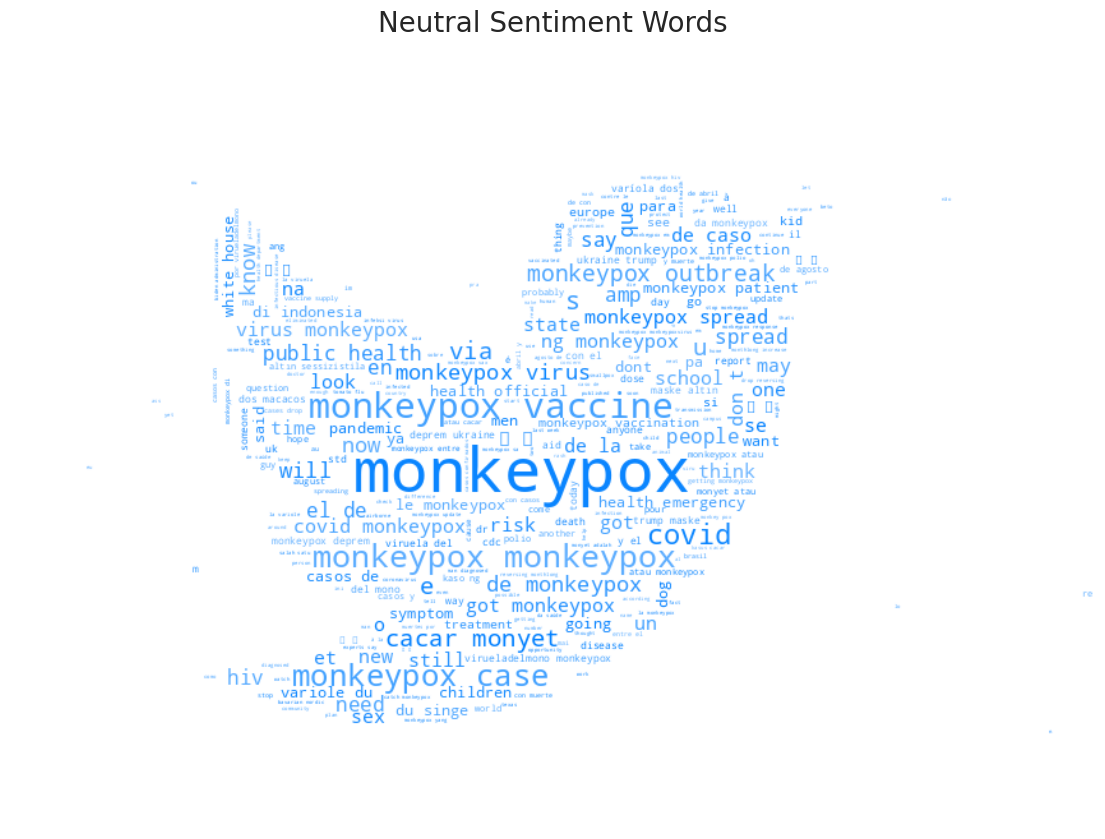

In [63]:
wordcount_gen(data, 'Neutral')

# Data preprocessing again for Modeling

In [64]:
def tweet_to_words(tweet):
    text = tweet.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]

    # Applying stemming
    words = [PorterStemmer().stem(w) for w in words]

    return words

In [65]:
print("\nOriginal tweet ->", data['Selected_text'][0])
print("\nProcessed tweet ->", tweet_to_words(data['Selected_text'][0]))


Original tweet -> they cant prove anything about covid or monkeypox

Processed tweet -> ['cant', 'prove', 'anyth', 'covid', 'monkeypox']


In [67]:
X = list(map(tweet_to_words, data['Selected_text']))

# Encoding target labels

In [68]:
le = LabelEncoder()
Y = le.fit_transform(data['Sentiment'])

print(X[0])
print(Y[0])

['cant', 'prove', 'anyth', 'covid', 'monkeypox']
1


# Train-Test Split

In [69]:
y = pd.get_dummies(data['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Bag of Words Feature Extraction

In [70]:
vocabulary_size = 5000

count_vector = CountVectorizer(max_features=vocabulary_size,
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x)

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [71]:
print(count_vector.get_feature_names_out()[0:200])

['aatmanirbharbharat' 'ab' 'abandon' 'abc' 'abi' 'abia' 'abil' 'abl'
 'abort' 'abril' 'abroad' 'absolut' 'abstain' 'abstin' 'absurd' 'abt'
 'abus' 'acceler' 'accept' 'access' 'accid' 'accident' 'accord' 'account'
 'accur' 'accus' 'ach' 'achiev' 'acho' 'acid' 'acknowledg' 'acn' 'acquir'
 'across' 'act' 'action' 'activ' 'activist' 'actual' 'acut' 'ad' 'ada'
 'adalah' 'adalja' 'adam' 'adapt' 'add' 'addict' 'addit' 'address' 'adequ'
 'admin' 'administ' 'administr' 'admit' 'adolesc' 'adopt' 'adult' 'advanc'
 'advers' 'advertis' 'advic' 'advis' 'advisor' 'advisori' 'advoc'
 'aerosol' 'af' 'affair' 'affect' 'affenpocken' 'affidavit' 'affirm'
 'afflict' 'afford' 'afraid' 'africa' 'african' 'afrika' 'afta'
 'afternoon' 'ag' 'agar' 'age' 'agenc' 'agenda' 'agent' 'aggress' 'ago'
 'agora' 'agosto' 'agre' 'agreement' 'agustu' 'ah' 'ahead' 'ahora' 'ai'
 'aid' 'ailment' 'aim' 'ainda' 'aint' 'air' 'airborn' 'airlin' 'airport'
 'aja' 'aka' 'akan' 'akledin' 'ako' 'akong' 'aku' 'al' 'alabama' 'alam'
 'al

# Plotting the BoW feature vector

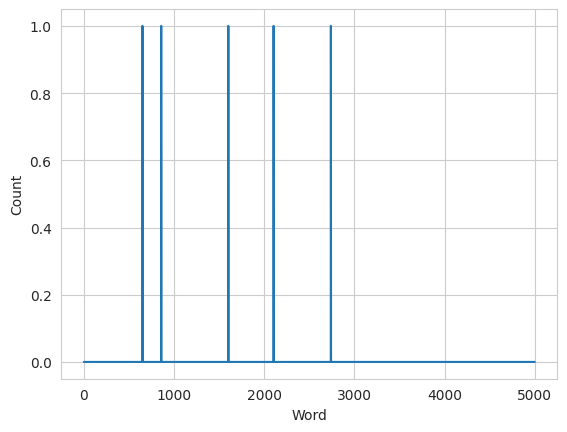

In [72]:
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

# Tokenization and Padding

In [73]:
max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)

    return X, tokenizer

print('Before Tokenization & Padding :-\n', data['Selected_text'][0])
X, tokenizer = tokenize_pad_sequences(data['Selected_text'])
print('After Tokenization & Padding :-\n', X[0])

Before Tokenization & Padding :-
 they cant prove anything about covid or monkeypox
After Tokenization & Padding :-
 [  33  331 2708  452   30   23   36    1    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


# Data Splitting

In [74]:
y = pd.get_dummies(data['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (57147, 50) (57147, 3)
Validation Set -> (19049, 50) (19049, 3)
Test Set -> (19050, 50) (19050, 3)


In [81]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define the batch size
batch_size = 32  # You can adjust this based on your preferences and available resources

# Example data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Calculate decay steps
decay_steps = len(X_train) // batch_size

# Rest of your code with learning rate scheduler


# Bi-Directional LSTM

In [83]:
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

from keras.optimizers import SGD
sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)


# Building model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

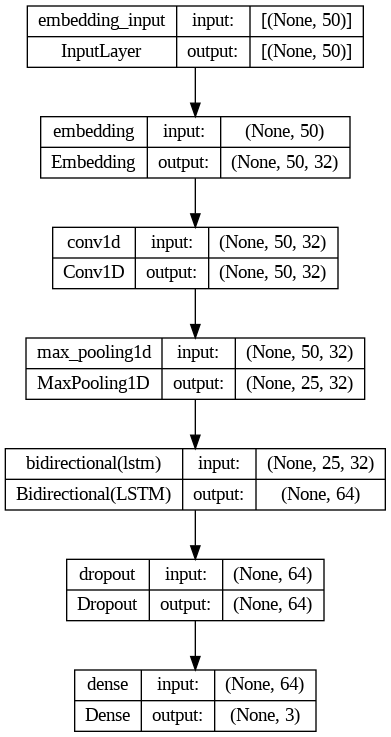

In [84]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [85]:
print(model.summary())

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Training model
batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 25, 32)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

# Model Accuracy and Loss

In [89]:
from sklearn.metrics import f1_score

loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
f1 = 2 * (precision * recall) / (precision + recall)
print('F1 Score  : {:.4f}'.format(f1))



Accuracy  : 0.9597
Precision : 0.9614
Recall    : 0.9582
F1 Score  : 0.9598


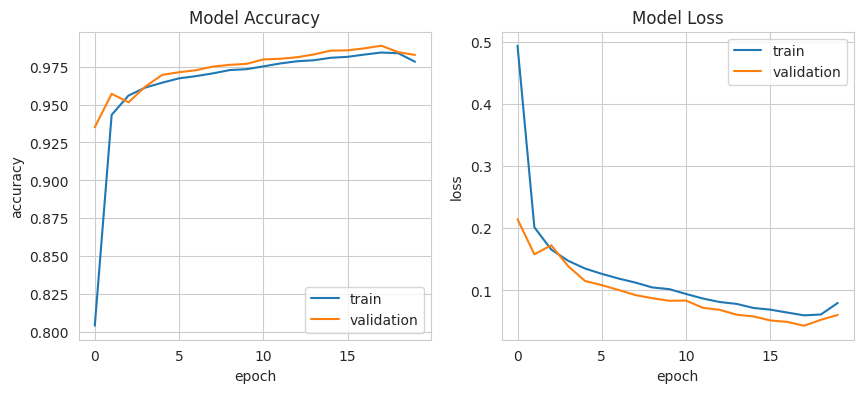

In [90]:
def plot_training_hist(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

# Plotting Confusion Matrix

596/596 [==============================] - 5s 7ms/step


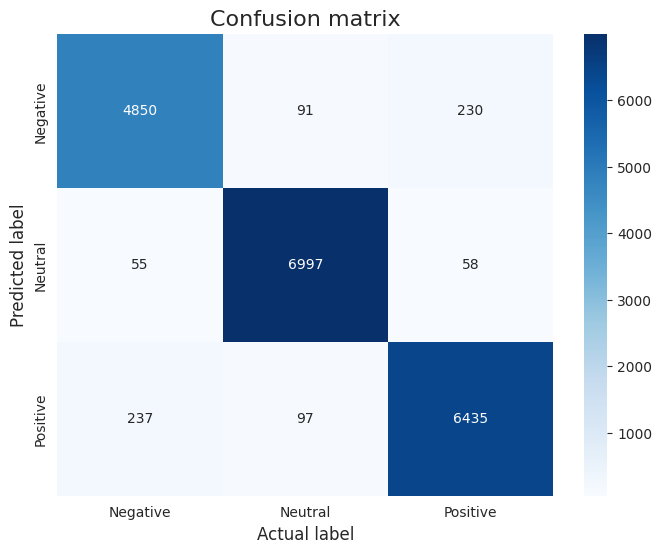

In [91]:
def plot_confusion_matrix(model, X_test, y_test):
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    y_pred = model.predict(X_test)

    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

# Saving the Model Architecture & the Weights

In [101]:
model.save('Monkeypax_Analysis_model.h5')

print('Monkeypax Analysis saved')

Monkeypax Analysis saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [102]:
model = load_model('Monkeypax_Analysis_model.h5')

def predict_class(text):
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50

    xt = tokenizer.texts_to_sequences(text)
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    yt = model.predict(xt).argmax(axis=1)

    print('The predicted sentiment is', sentiment_classes[yt[0]])

# User testing demos..

In [94]:
predict_class(['MonkeyPox is a bit deadly'])

1/1 [==============================] - 1s 876ms/step
The predicted sentiment is Negative


In [95]:
predict_class(['MonkeyPox has not caused so many deaths'])

1/1 [==============================] - 0s 30ms/step
The predicted sentiment is Positive


In [96]:
predict_class(['Monkeypox is not airborne'])

1/1 [==============================] - 0s 24ms/step
The predicted sentiment is Neutral
